# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [6]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
from random import randint as rnd
indices = [rnd(1,150), rnd(151, 300), rnd(301, 440)]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7780,2495,9464,669,2518,501
1,444,879,2060,264,290,259
2,25977,3587,2464,2369,140,1092


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:
   
    MEAN  |  Median
* Fresh: 12000.2977  |  8504
* Milk: 5796.2       |  3627
* Grocery: 7951.3    |  4756
* Frozen 3071        |  1526
* Detergents_paper: 2881.4 | 817
* Delicatessen: 1524.8  |  965

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
I feel like there is bias in the mean due to some large outliers which could include wholesalers. This is why I've included the median above to compare as well. 

**Customer 1)**
This customer has a lower than average Fresh, Milk, Grocery, Frozen and Delicatessen, but not far off the mean and above mode in Fresh and Grocery. They are only above the mean in detergents. This may indicate that they're a small shop/grocers. 

**Customer 2)**
I would say that this is likely to be a cafe. They have use more milk than 50% of the other customers and a decent amount of groceries and deli food that they could be serving. High in detergent for washing up the cafe.

**Customer 3)** I'm going to say that they are a small market. They only really spend money on Fresh and Frozen but still below both averages in each case.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [36]:
score


0.0

In [5]:
# TODO: Make a coy of the DataFrame, using the 'drop' function to drop the given feature
features=data['Detergents_Paper']
new_data = data.drop(['Detergents_Paper'], axis=1)
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.metrics import r2_score as r2
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
random_state=0
X_train, X_test, y_train, y_test = train_test_split(new_data, features, test_size=0.25, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DTR(max_depth=5, min_samples_leaf=3,random_state=0)
regressor.fit(X_train, y_train)
# TODO: Report the score of the prediction using the testing set
y_pred=regressor.predict(X_test)
score = regressor.score(X_test, y_test)
score2 = r2(y_test, y_pred)
print("Score is %f" % score)

C:\Users\Calvin\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Score is 0.819223


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

I chose to remove Detergent_Papers from the dataset to see if it is easily predicted. We got a score of 0.819223, so we can say the predictor variables make up about 82% of the variance in the Detegent_Papers value. Without testing the other values I would say that this is a pretty high score and also means that we could predict with pretty good accuracy this value without it being there. So it is not necessary for considering customers spending.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\Calvin\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


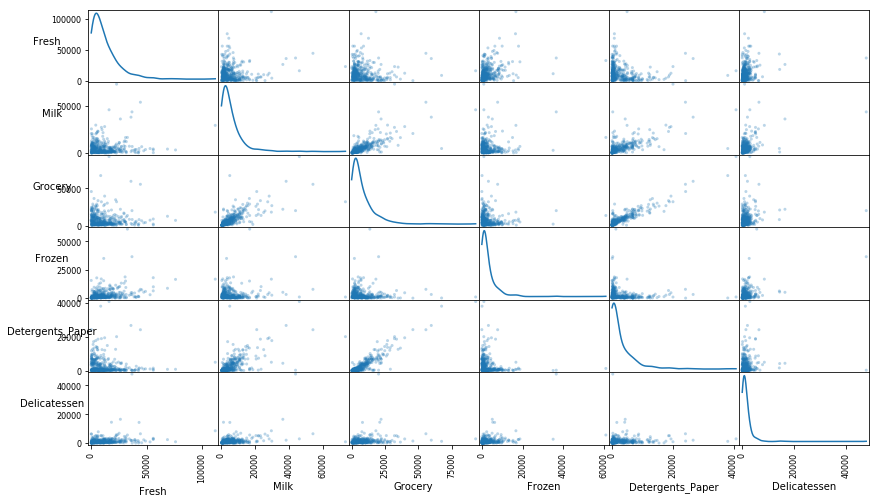

In [6]:
# Produce a scatter matrix for each pair of features in the data
import matplotlib.pyplot as plt
sm=pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

plt.show()

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

In [53]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


(0, 80000)

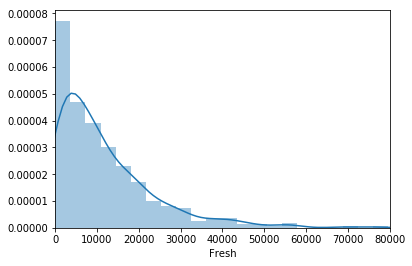

In [65]:
plt.clf()
distplot(data['Fresh'])
plt.xlim(0, 80000)

**Answer:**

All features of the data are rightly skewed which is often the case when referring to monetary values, or any other values that have a limit in one direction but not the other. So the Median and Mode of all features occurs relatively close to 0 with less and less data points being further away which leads to a mean that is not really representative of the actual average. In this scenario I'd asume all outliers are the wholesale retailers who although are only few with have 10 times the magnitude of items compared to a cafe etc. 
As for the correlation matrix it looks like Detergent_Papers is the most predictable feature, because it is highly correlated with Groceries and Milk. Milk and groceries themselves are aslo closely correlated. Again from seeing the other correlations we could say that Detergent is the least important feature in the set. It looks like Fresh would be the hardest item to predict using the others so possibly the most important in the dataset.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\Calvin\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead


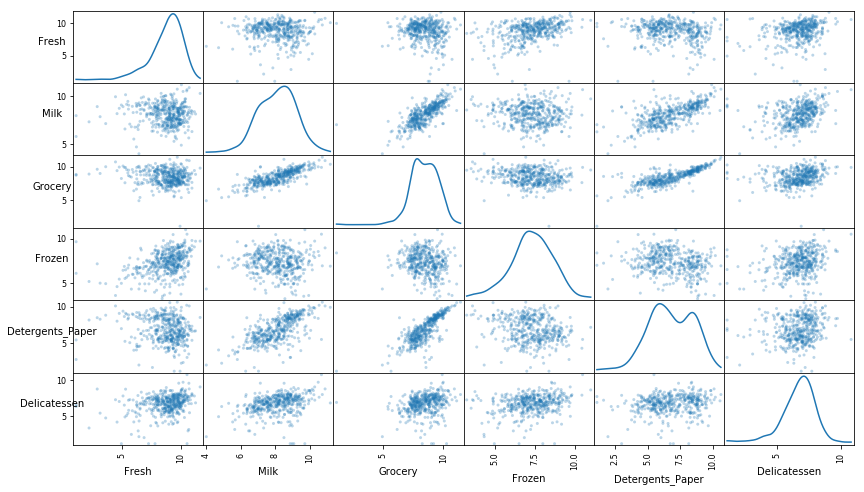

In [9]:
# TODO: Scale the data using the natural logarithm
from numpy import log
#Create mylog in case of any 0s in the data, but I don't think there are any
def mylog(x):
    if x==0:
        return 0
    else:
        return log(x)

#Apply mylog to each entry in the dataframe
log_data = data.applymap(lambda x:mylog(x))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.applymap(lambda x:mylog(x))

# Produce a scatter matrix for each pair of newly-transformed features
sm=pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

plt.show()

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

**Observation Answer:**

It looks like the same correlations exist, i.e between Detergent, Groceries and Milk. The correlations are definitely more visible in the transformed data. Then the skewness has been taken away as expected leaving more normal looking graphs, with Detergent and to a lesser extent Groceries being bi-modal. 


In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.959312,7.822044,9.155250,6.505784,7.831220,6.216606
1,6.095825,6.778785,7.630461,5.575949,5.669881,5.556828
2,10.164967,8.185071,7.809541,7.770223,4.941642,6.995766


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [12]:
# For each feature find the data points with extreme high or low values
from collections import Counter as countby
outliers  = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    rows = (log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]).index.values
    for i in rows:
        outliers.append(i)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers_dict=countby(outliers)
print('The following rows contained one or more outliers \n')
print(outliers)
print('\n')
print("Below is a count of how many rows contained X amount of outliers \n")
print(countby(outliers_dict.values()))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


The following rows contained one or more outliers 

[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]


Below is a count of how many rows contained X amount of outliers 

Counter({1: 37, 2: 4, 3: 1})


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

We encountered 48 rows which included an outlier in at least 1 variable. However, no single entry contains all outliers. There is only one row that contains 3 outliers and that is the most. It is important to remove outliers from the data when using K-means clustering becasue it can destort where the optimal centroids should be placed. If for instnace we had two clear clusters but also a single outlier that is very far from either cluster, then one centroid would be used at the outlier and the second would be somewhere in between the two good clusters. This is because K-means looks to minimize the loss function and can do so by not having any distance from a cluster too large. 
For the project since we do not have a large amount of data points to begin with I'm going to increase the multiplier in the outlier detection and remove all outliers, even if they're only present in one of the features. 

In [64]:
# For each feature find the data points with extreme high or low values
from collections import Counter as countby
outliers  = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.7*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    rows = (log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]).index.values
    for i in rows:
        outliers.append(i)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers_dict=countby(outliers)
print("Below is a count of how many rows contained X amount of outliers \n")
print(countby(outliers_dict.values()))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918
353,4.762174,8.742574,9.961898,5.429346,9.069007,7.013016
357,3.610918,7.150701,10.011086,4.919981,8.816853,4.700480


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
154,6.43294,4.007333,4.919981,4.317488,1.94591,2.079442


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910


Below is a count of how many rows contained X amount of outliers 

Counter({1: 24, 2: 3, 3: 1})


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[0.50027667 0.23323911 0.10224168 0.09569853 0.04673477 0.02180925]


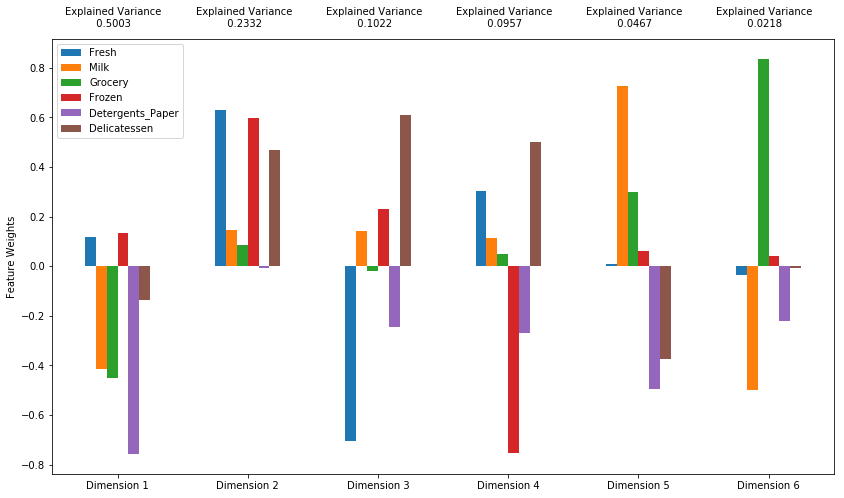

In [67]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6, svd_solver='full')
pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
print(pca.explained_variance_ratio_)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

The explained variance for the first 6 components of the data are [0.50027667 0.23323911 0.10224168 0.09569853 0.04673477 0.02180925] respectively. So the first two compoents expain 73.3% of the data and the first 4 components expamin 93% of our data. 
From the graph I see the most of the variance of feature 1 is made up from Detergent_Paper, Groceries and Milk, all of which al give a negative value to this PCA. So values with low feature one scores will (most likely) have very low spending on milk, groceries and detergent. The scond pca value is affected by the other variables much more and in the positive direction this time. So this time, values with high feature two scores will hae large spending on of Fresh, Frozen and Delicatesses. 
So in the first pca the spending on features such as milk, groceries and detergent is more important but in feature two the remaining features are more important. 
In the 3rd and 4th dimensions we see some what opposite affects from the previous 2. In the third both Fresh and Detergent have negative values. This indicates that these variables have an inverse relationship with this score. The opposite can be said for the other variables. In the fourth dimension Detergent becomes correlated with Frozen, both of them inversely with the 4th components score. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [68]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.0245,-0.7181,-0.9111,0.1330,-0.3606,0.4977
1,1.3552,-3.6498,0.8970,0.0253,-0.3307,0.2858
2,1.8269,1.1229,-0.2064,0.6905,0.7244,-0.1715


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [69]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, svd_solver='full')
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [70]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.0245,-0.7181
1,1.3552,-3.6498
2,1.8269,1.1229


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

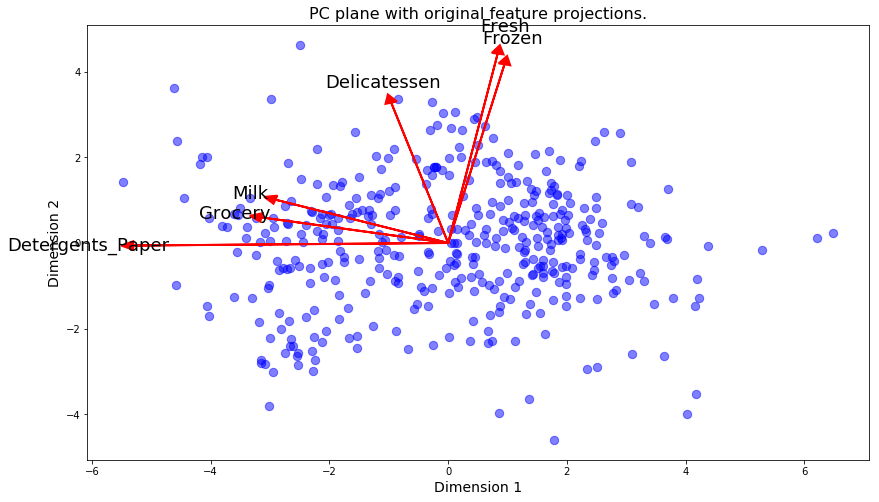

In [71]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Observation Answer**

From the graph we can tell which features are closely related to the dimensions as the ones that are most in parrallel with them. 
So here with Dimension 11 being represented in the X-axis we see Detergent_paper is nearly in parallel with groceries and milk not far behind. Then Dimension 2 is in the Y-axis and its most parallel feature is Fresh, followed by Frozen and Delicatessen. We can also see from the direction of the arrows the the features accociated with Dimension 1 are negatively correlated with it and the features associated with Dimension 2 are positively correlated with it. This all matches what we observed in the previous section which is great!

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

**Advantages of K-Means**
* Running time will be better than in GMM. Should be used on high dimension data.
* It is easy to implement and understand as it uses hard clustering.
* Works better where the shape of the data is known to be linear.

**Advantages of GMM**
* It can handle complex geometrical data, i.e. non-linear data.
* Does not use hard clustering but rather probabilities. 

I'm going to use the GMM model for this dataset. This is becasue we do not have an extremely large set of data or dimensions so the speed of the model should not be an issue. Then I alos do not know if the clusters will be geometrically circular and if they are not the K-means model could easily mis-classify. 


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [82]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import  GaussianMixture as GMM
from sklearn.metrics import silhouette_score as sil_score
num_clusters=[2,3,4,5,10,15, 50]
for n in num_clusters:
    gmm=GMM(n_components=n, n_init=10)
    clusterer = gmm.fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds = gmm.predict(reduced_data)

# TODO: Find the cluster centers
    centers = gmm.means_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds = gmm.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = sil_score(reduced_data, preds)
    print('With %d clusters we get a Silhoutte Score of: %f' % (n,score) )

With 2 clusters we get a Silhoutte Score of: 0.437868
With 3 clusters we get a Silhoutte Score of: 0.370902
With 4 clusters we get a Silhoutte Score of: 0.193925
With 5 clusters we get a Silhoutte Score of: 0.255649
With 10 clusters we get a Silhoutte Score of: 0.333321
With 15 clusters we get a Silhoutte Score of: 0.321756
With 50 clusters we get a Silhoutte Score of: 0.286945


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

The scores for a several different clusters can be seen above. The optimal number of clusters is 2, which is what I was hoping for as it may then be easy to say that one cluster contains customers who were not affected by the delivery time changes and another cluster who were. This would then be able to account for no drop in sales if this practice was mainly or totally applied only to customers in one cluster. Then when the second cluster became affected their sales dropped.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [84]:
gmm=GMM(n_components=2, n_init=10)
clusterer = gmm.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = gmm.predict(reduced_data)

# TODO: Find the cluster centers
centers = gmm.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = gmm.predict(pca_samples)

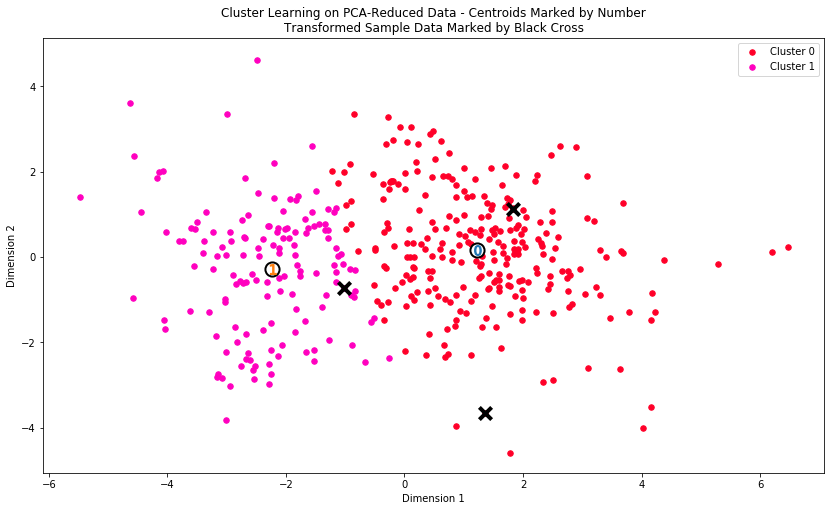

In [85]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [87]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9108.0,2069.0,2661.0,2086.0,351.0,791.0
Segment 1,4577.0,8218.0,12191.0,1006.0,4888.0,1038.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

So from everything we have seen I think we can split this data mainly based on the total spending of Detergent_Paper, Milk and Groceries vs the other features. Above we see that Segment 0 has higher values of Fresh and Frozen but lower in everything else. I did expect that it would also be higher in Delicatessen but from the Biplot we can say that Delicatessen wasn't completely uncorrelated with the features heavily weighted in Segment 2. 
From this I think there is 1 main difference between the segments. I think Segment 1 is a compilation of shops  and Segment 2 contains cafes and resteraunts or anywhere you can eat at. This is mainly due to Detergent Papers. Places that serve food will need a lot more to sanities and clean anywhere that food is prepared and also to clean tables etc. Segment 2 also has high values of Milk, Groceries and Deli stuffs because they can all be served to customers. Segemnt 2 then has higher costs in Fresh and Frozen stuff. It makes complete sense for frozen food to be a lot higher in a supermarket, and although it could be argued that a restraunt also needs fresh food, on average they might not need as much. Supermarkets can have fresh fish and meat sections but also all of their fruit and veg would be fresh too so it makes sense for them to be split by these features. 

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [90]:
# Display the predictions
display(samples)
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7780,2495,9464,669,2518,501
1,444,879,2060,264,290,259
2,25977,3587,2464,2369,140,1092


('Sample point', 0, 'predicted to be in Cluster', 1)
('Sample point', 1, 'predicted to be in Cluster', 0)
('Sample point', 2, 'predicted to be in Cluster', 0)


**Answer:**

I think the first and last predictions are correct, but the second is questionable. It says that customer 0 is a Resaurant/Cafe and the others are shops of some kind. We can say this because customer 0 has a much higher cost in Detergent, which is close to the mean (2881) and much higher than the median (817). They also have a high cost in groceriers than the other two and also a pretty high cost in Milk which were the 3 main features associated with places that server food. Overall they have an above average cost for Groceries but less than average value for milk. This then makes me think it is more likely again to be a restraunt that may only need milk for a few dishes compared to a cafe that would use it for a variety of drinks. 

I think that the customer 1 could be a very small shop but more likely a very small food stall. I'm saying this becasue 1 has very low values in everything, below the mean and median in all 6 categories. The only value it has above the 25% is Detergent papers which makes me think it could be a place that serves food. where the majority of customers have higher spending on Fresh to Milk and Groceries the opposit can be said here. This customer has relatively high Detergent, Milk and Groceries which normally indicated a Delicatessent.

The final customer I think is safe to say is a large shop/supermarket because it has high values across the board but still low in Detergent_Papers. It has much higher values than customer 0 in Fresh and Frozen which we know are associated with shops. The fact that it's cost in Milk is higher is probably just due to the sheer size of the shop. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

We should not assume that the change affects all customers equally. Since we can see that their are 2 distinct groups of customers we should make sure when doing our A/B tests that both groups are represented equally. This would involve taking a proportion of customers from Segment 0 and others from Segment 1. We can then switch only these customers over to the cheaper delivery system as a trial. If we notice any adverse affects, like losing our customers primarily from either group we can then say that it is not worth switching any other customers who fall into the same cluster as they are also likely to leave. 
Then if the other group shows no significent decline in business we can aplly the new system to all other customers in our population who match their characteristics. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

So we can train our current data like we just did. Then apply the previously used PCA to the new set of data and fit it with our clustering model. This will let us know which customer segment the 10 new clients would most likely fall into. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

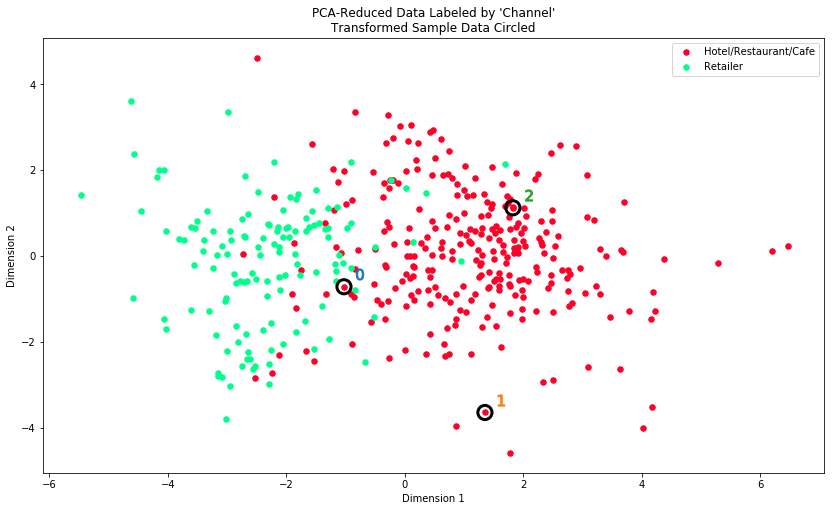

In [91]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

This data set looks very similar to how we had already split the data. Furthermore it is basically split on a variable I had mentioned, places that serve/cook food to ones that don't but still sell food. There is some layover between the sets due to the size of each customer. The main axis that splits them though is the X-axis which was most parallel to the Detergent_Papers features and again this is due to the necessity of cleaning in the Hotels/Restaurants/Cafes business compare to the Retail business. 
Overall I think I split the data pretty well with my model.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.